<h2> Montgomery County, PA (USA) 911 Calls</h2>
<p> Analysis of calls made to 911 in Montgomery County, Pennsylvania. Data sourced from <a href="https://www.kaggle.com/">
    Kaggle</a>; the dataset can be found <a href="https://www.kaggle.com/mchirico/montcoalert"> here</a>.</p>

<p> Prepare libraries and styles:</p>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
sns.set_palette('viridis')
%matplotlib inline

df=pd.read_csv("911_Calls.csv")
#df.head(3)

<p> Create a "Reason" (for call) column, sourced from df[title]. Subsequently plot this.</p>

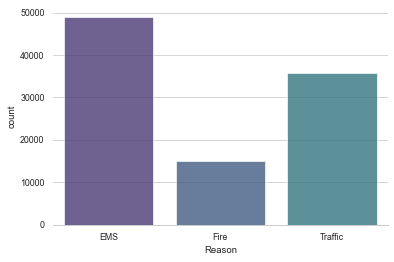

In [70]:
df['Reason']=df['title'].apply(lambda s: s.split(':')[0])
sns.countplot(x='Reason', data=df,alpha=0.8)
sns.despine(left=True)

<p>The timeStamp column is of data type 'String'. Convert this to a date time and extract month, day of week and hour of day information. </p>

In [74]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['Month']=df['timeStamp'].apply(lambda m : m.month)
df['Hour']=df['timeStamp'].apply(lambda h: h.hour)

# Map integer day of week to human readable days
def parseDay(s):
    dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    return dmap.get(s.weekday())

df['Day of week']=df['timeStamp'].apply(parseDay)

<p>Plot reasons for calls vs the day of the week and month.</p>

<AxesSubplot:title={'center':'Monthly Calls'}, xlabel='Month', ylabel='count'>

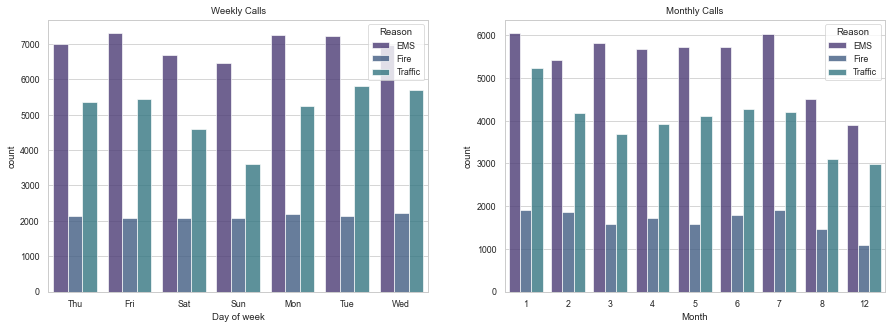

In [73]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].set_title('Weekly Calls')
sns.countplot(ax=axes[0],x='Day of week', data=df,hue='Reason', alpha=0.8)

axes[1].set_title('Monthly Calls')
sns.countplot(ax=axes[1],x='Month', data=df,hue='Reason', alpha=0.8)



<p> Reshape the Data Frame to prepare it for heat mapping, and then map: </p>

<AxesSubplot:xlabel='Month', ylabel='Day of week'>

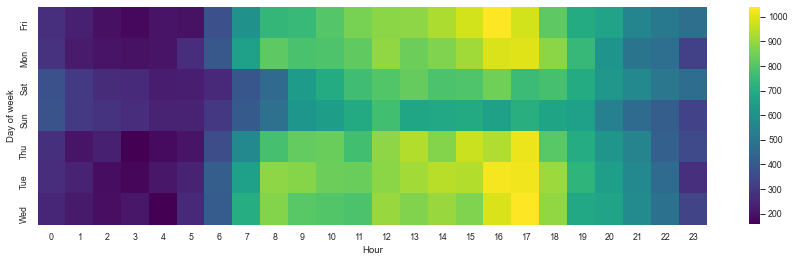

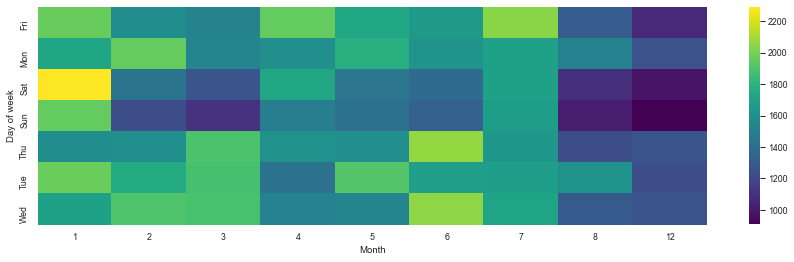

In [87]:
#Reshape for heat mapping of day vs hour
dayHour=df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()
#dayHour.head(7)
plt.figure(figsize=(15,4))
sns.heatmap(data=dayHour,cmap='viridis')


# Same process for day vs month
dayMonth=df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()
plt.figure(figsize=(15,4))
sns.heatmap(data=dayMonth,cmap='viridis')

<p> Use a cluster map to group similar data and make conclusions:</p>

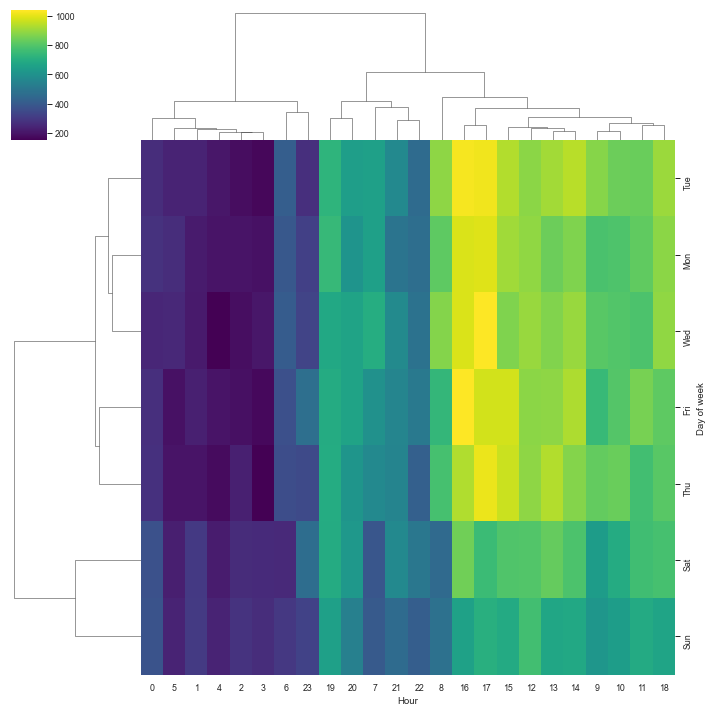

In [90]:
sns.clustermap(data=dayHour, cmap='viridis')

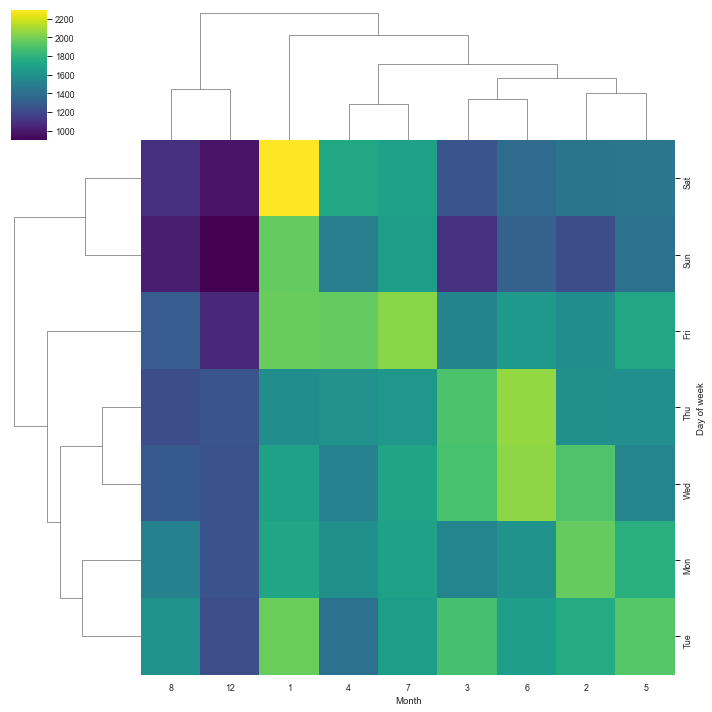

In [91]:
sns.clustermap(data=dayMonth,cmap='viridis')

<p> The above (quick) data analysis allows us to draw the following conclusions: 
<ul>
    <li>Fire occurrence is independent of day of the week, but related to time of the year (month). This is likely due to seasonal changes. Missing data for the months of September, October and November make the exact conclusion difficult to draw.</li>
    <li>Traffic-related calls are (somewhat predictably) fewer during the weekends.</li>
    <li>On a daily basis, the most 911 calls are made <strong>between 15:00-18:00</strong>.While on a weekly basis, <strong>Saturday produces by far the most calls</strong>.</li>
    
    
</ul>